In [2]:
ls -lh data

total 287M
-rw-r--r-- 1 stephen stephen 239M Aug  2  2016 data.json
-rw-rw-r-- 1 stephen stephen  33M Dec 17 08:47 data.zip
-rw-rw-r-- 1 stephen stephen  16M Dec 17 09:02 subset.json


In [3]:
!wc data/data.json

        0   8173151 250481668 data/data.json


In [4]:
%%writefile subset_json.py
"""head_json.py - extract a couple records from a huge json file.

Syntax: python head_json.py < infile.json > outfile.json
"""

import sys

start_char = '{'
stop_char = '}'
n_records = 1000
level_nesting = 0

while n_records != 0:
    ch = sys.stdin.read(1)
    sys.stdout.write(ch)
    if ch == start_char:
        level_nesting += 1
    if ch == stop_char:
        level_nesting -= 1
        if level_nesting == 0:
            n_records -= 1
sys.stdout.write(']')

Overwriting subset_json.py


In [5]:
!python subset_json.py < data/data.json > data/subset.json

In [3]:
import pandas as pd


df = pd.read_csv('data/final_columns.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   body_length          14337 non-null  int64  
 1   channels             14337 non-null  int64  
 2   fb_published         14337 non-null  int64  
 3   has_logo             14337 non-null  int64  
 4   name_length          14337 non-null  int64  
 5   org_facebook         14337 non-null  float64
 6   org_twitter          14337 non-null  float64
 7   show_map             14337 non-null  int64  
 8   user_age             14337 non-null  int64  
 9   user_type            14337 non-null  int64  
 10  Label                14337 non-null  int64  
 11  month                14337 non-null  int64  
 12  day                  14337 non-null  int64  
 13  hour                 14337 non-null  int64  
 14  minute               14337 non-null  int64  
 15  dayofyear            14337 non-null 

In [8]:
df['acct_type'].head(50)

0     fraudster_event
1             premium
2             premium
3             premium
4             premium
5             premium
6             premium
7             premium
8             premium
9             premium
10            premium
11            premium
12            premium
13       spammer_warn
14            premium
15            premium
16            premium
17            premium
18            premium
19            premium
20            premium
21            premium
22            premium
23            premium
24            premium
25            premium
26          fraudster
27            premium
28            premium
29            premium
30            premium
31            premium
32       spammer_warn
33            premium
34            premium
35            premium
36            premium
37            premium
38            premium
39            premium
40            premium
41            premium
42            premium
43            premium
44            premium
45        

In [9]:
df["acct_type"] = df['acct_type'].replace('fraudster_event', 'fraudster')
df["acct_type"] = df['acct_type'].replace('fraudster_att', 'fraudster')

In [10]:
import numpy as np

df['fraud'] = np.where(df['acct_type'] == 'fraudster', 1, 0)

In [11]:
df['venue_country'] = df['venue_country'].replace('', 'None')

In [12]:
df['venue_country'] = df['venue_country'].fillna('None')

In [13]:
df['is_us'] = np.where(df['venue_country'] == 'US', 1, 0)
df['is_none'] = np.where(df['venue_country'] == 'None', 1, 0)
df1 = df.drop(['country', 'currency', 'acct_type', 'approx_payout_date', 'description', 'email_domain', 'event_published'], axis = 1)

In [14]:
df1 = df1.drop(['user_type', 'has_analytics', 'venue_name', 'venue_address', 'venue_latitude', 'venue_longitude'], axis = 1)

In [15]:
df1 = df1.drop(['payouts'], axis = 1)

KeyError: "['payouts'] not found in axis"

In [16]:
df1['pre_payouts'] = len(df1['previous_payouts'])

In [17]:
df1['time_diff'] = df1['event_end'] - df1['event_start']

In [18]:
df1.columns

Index(['body_length', 'channels', 'delivery_method', 'event_created',
       'event_end', 'event_start', 'fb_published', 'gts', 'has_header',
       'has_logo', 'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'venue_country', 'venue_state', 'fraud', 'is_us',
       'is_none', 'pre_payouts', 'time_diff'],
      dtype='object')

In [23]:
df['approx_payout_date'] = pd.to_datetime(df['approx_payout_date'], unit = 's')

In [260]:
df1['prev_pay0'] =  np.where(df1['truth_col'] == 0, 1, 0)

In [108]:
df1['previous_payouts'] = df['previous_payouts'].replace([], 'None')

In [276]:
df1['truth_col'] = df1['ticket_types'][0]['event_id'].apply(lambda x: x)


KeyError: 'previous_payouts'

In [1]:
df1.columns

NameError: name 'df1' is not defined

In [280]:
labels = np.array(df1['fraud'])
features = np.array(df1.drop('fraud', axis = 1))

In [281]:
df1.columns

Index(['body_length', 'channels', 'delivery_method', 'fb_published',
       'has_header', 'has_logo', 'name_length', 'org_facebook', 'org_twitter',
       'show_map', 'user_age', 'fraud', 'is_us', 'is_none', 'time_diff',
       'prev_pay0'],
      dtype='object')

In [ ]:
from sklearn.metrics import roc_curve

In [282]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(features, labels, test_size = 0.25)

In [283]:
from sklearn.model_selection import cross_val_score

In [300]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000)

In [301]:
rf.fit(trainX, trainY)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [316]:
predictions = rf.predict_proba(testX)
yhat = rf.predict(testX)

In [306]:
predictions = predictions[:, 1]

In [291]:
scores = cross_val_score(rf, testX, testY, cv=10, scoring = 'neg_mean_absolute_error')

In [317]:
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [320]:
rf_f1 = f1_score(testY, yhat)
print(rf_f1)

0.8760064412238325


In [314]:
Rfpr, Rtpr, _ = roc_curve(testY, predictions)
Nfpr, Ntpr, _ = roc_curve(testY, ns_probs)

In [310]:
import matplotlib.pyplot as plt

In [313]:
ns_probs = [0 for _ in range(len(testY))]

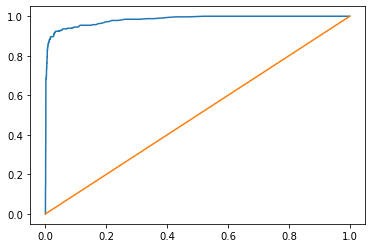